In [2]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import seaborn as sns
import graphviz
import random

In [16]:
columns = [f'prop_{str(i)}' for i in range(1, 35)] + ['class']

data = pd.read_csv('../input/ionosphere/ionosphere.csv', delimiter=',', names=columns)

df = pd.DataFrame(data)
df


,prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7,prop_8,prop_9,prop_10,...,prop_26,prop_27,prop_28,prop_29,prop_30,prop_31,prop_32,prop_33,prop_34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   prop_1   351 non-null    int64  
 1   prop_2   351 non-null    int64  
 2   prop_3   351 non-null    float64
 3   prop_4   351 non-null    float64
 4   prop_5   351 non-null    float64
 5   prop_6   351 non-null    float64
 6   prop_7   351 non-null    float64
 7   prop_8   351 non-null    float64
 8   prop_9   351 non-null    float64
 9   prop_10  351 non-null    float64
 10  prop_11  351 non-null    float64
 11  prop_12  351 non-null    float64
 12  prop_13  351 non-null    float64
 13  prop_14  351 non-null    float64
 14  prop_15  351 non-null    float64
 15  prop_16  351 non-null    float64
 16  prop_17  351 non-null    float64
 17  prop_18  351 non-null    float64
 18  prop_19  351 non-null    float64
 19  prop_20  351 non-null    float64
 20  prop_21  351 non-null    float64
 21  prop_22  351 non

It seems no missing value.

In [17]:
df.loc[df['class'] == 'g', 'class'] = 1
df.loc[df['class'] == 'b', 'class'] = 0
df

,prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7,prop_8,prop_9,prop_10,...,prop_26,prop_27,prop_28,prop_29,prop_30,prop_31,prop_32,prop_33,prop_34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [18]:
df.head(5)

,prop_1,prop_2,prop_3,prop_4,prop_5,prop_6,prop_7,prop_8,prop_9,prop_10,...,prop_26,prop_27,prop_28,prop_29,prop_30,prop_31,prop_32,prop_33,prop_34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [19]:
# Remove nulls
df.dropna(inplace=True)





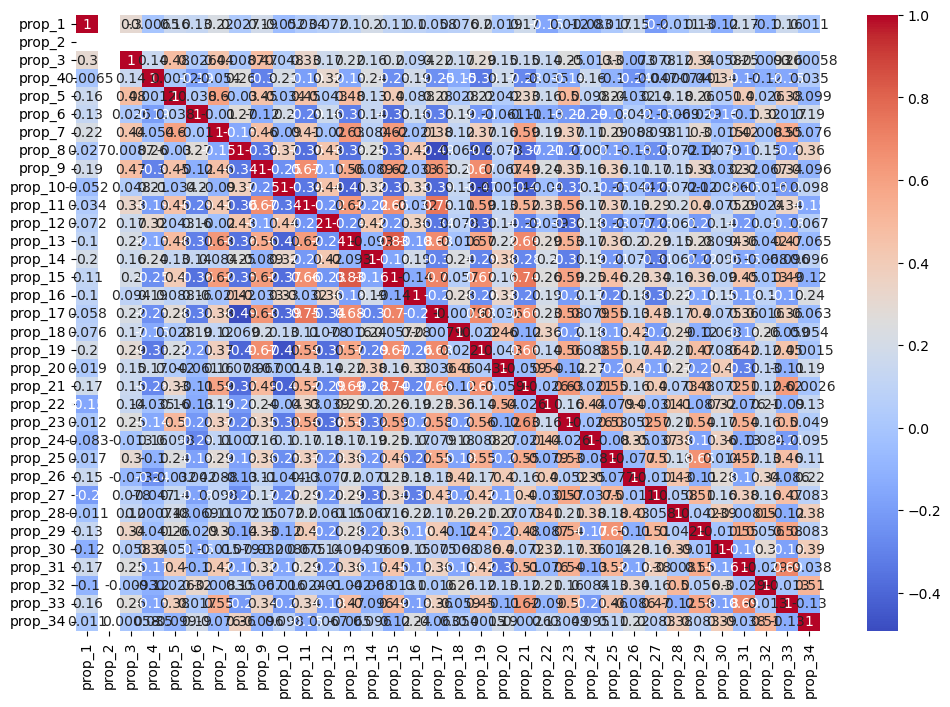

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Set the plot size
plt.figure(figsize=(12,8))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()



## Logistic reg

In [21]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: int(x))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   prop_1   351 non-null    int64
 1   prop_2   351 non-null    int64
 2   prop_3   351 non-null    int64
 3   prop_4   351 non-null    int64
 4   prop_5   351 non-null    int64
 5   prop_6   351 non-null    int64
 6   prop_7   351 non-null    int64
 7   prop_8   351 non-null    int64
 8   prop_9   351 non-null    int64
 9   prop_10  351 non-null    int64
 10  prop_11  351 non-null    int64
 11  prop_12  351 non-null    int64
 12  prop_13  351 non-null    int64
 13  prop_14  351 non-null    int64
 14  prop_15  351 non-null    int64
 15  prop_16  351 non-null    int64
 16  prop_17  351 non-null    int64
 17  prop_18  351 non-null    int64
 18  prop_19  351 non-null    int64
 19  prop_20  351 non-null    int64
 20  prop_21  351 non-null    int64
 21  prop_22  351 non-null    int64
 22  prop_23  351 non-null    i

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Split data into features and target
X = df.drop("class", axis=1)
y = df["class"]

# Create logistic regression model
lr_model = LogisticRegression()

# Compute cross-validated accuracy score
cv_scores = cross_val_score(lr_model, X, y, cv=5)

# Print average accuracy and standard deviation
print("Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Accuracy: 0.81 (+/- 0.09)


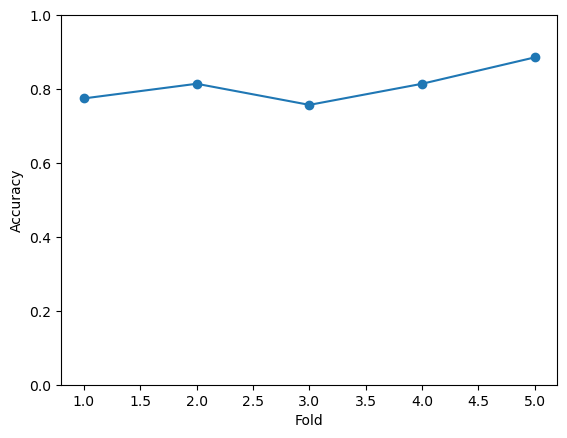

In [24]:
import matplotlib.pyplot as plt

# Compute cross-validated accuracy scores for each fold
cv_scores = cross_val_score(lr_model, X, y, cv=5)

# Create line plot of accuracy scores
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim((0.0, 1.0))
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Fit logistic regression model
lr_model.fit(X, y)

# Make predictions
y_pred = lr_model.predict(X)

# Compute precision, recall, and F1 score
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.63      0.75       126
           1       0.82      0.97      0.89       225

    accuracy                           0.85       351
   macro avg       0.88      0.80      0.82       351
weighted avg       0.86      0.85      0.84       351



## Decesion Tree

Accuracy: 0.7746478873239436


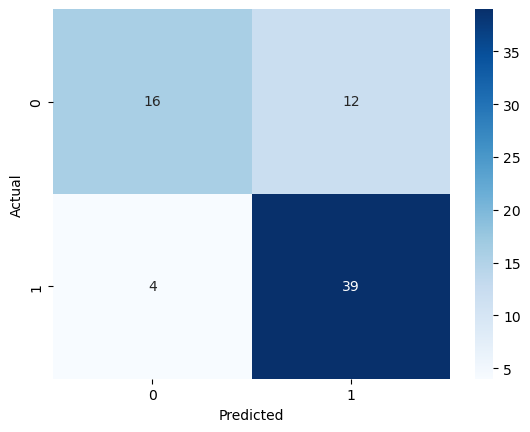

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        28
           1       0.76      0.91      0.83        43

    accuracy                           0.77        71
   macro avg       0.78      0.74      0.75        71
weighted avg       0.78      0.77      0.77        71



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the decision tree classifier and fit it to the training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict the class of the testing set
y_pred = dt.predict(X_test)

# Calculate the accuracy score of the model
accuracy = dt.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model on the training data
nb.fit(X_train, y_train)

# Use the model to predict the class labels of the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8490566037735849
Precision: 0.8490096101882093
Recall: 0.8490566037735849
F1 Score: 0.8460017969451931
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        39
           1       0.85      0.93      0.89        67

    accuracy                           0.85       106
   macro avg       0.85      0.82      0.83       106
weighted avg       0.85      0.85      0.85       106

